In [1]:
import catboost
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from catboost import Pool, CatBoostRegressor, CatBoostClassifier
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pylab import rcParams
from sklearn.model_selection import train_test_split

# matplotlib settings
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 12, 8
rcParams['font.size'] = 12
rcParams['axes.facecolor'] = 'white'

In [2]:
dataset = np.array([[1,4,5,6],[4,5,6,7],[30,40,50,60],[20,15,85,60]])
train_labels = [1.2,3.4,9.5,24.5]

In [3]:
model = CatBoostRegressor(learning_rate=1, depth=6, loss_function='RMSE', logging_level='Verbose') 

## CatBoost Example Usage

### CatBoost Classifier

In [4]:
# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 2, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))
# specify the training parameters 
model = CatBoostClassifier(iterations=2, depth=2, learning_rate=1, loss_function='Logloss', logging_level='Verbose')
#train the model
model.fit(train_data, train_label, cat_features=[0,2,5])
# make the prediction using the resulting model
preds_class = model.predict(test_data)
preds_proba = model.predict_proba(test_data)
print("class = ", preds_class)
# print("proba = ", preds_proba)

0:	learn: 0.6740464	total: 62.8ms	remaining: 62.8ms
1:	learn: 0.6215425	total: 69.8ms	remaining: 0us
class =  [ 0.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.  1.
  0.  1.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.]


### CatBoostRegressor 

In [5]:
# initialize data
train_data = np.random.randint(0, 100, size=(100, 10))
train_label = np.random.randint(0, 1000, size=(100))
test_data = np.random.randint(0, 100, size=(50, 10))
# initialize Pool
train_pool = Pool(train_data, train_label, cat_features=[0,2,5])
test_pool = Pool(test_data, cat_features=[0,2,5]) 

# specify the training parameters 
model = CatBoostRegressor(iterations=2, depth=2, learning_rate=1, loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
preds = model.predict(test_pool)
print(preds)

0:	learn: 286.3509662	total: 10.7ms	remaining: 10.7ms
1:	learn: 283.7178285	total: 16.9ms	remaining: 0us
[ 434.615625    545.8         545.8         478.64166667  545.8
  501.77395833  478.64166667  478.64166667  545.8         545.8
  478.64166667  478.64166667  545.8         545.8         545.8
  501.77395833  193.70833333  478.64166667  545.8         478.64166667
  501.77395833  545.8         545.8         501.77395833  545.8
  478.64166667  545.8         545.8         478.64166667  478.64166667
  545.8         545.8         545.8         545.8         545.8         545.8
  179.10833333  545.8         545.8         545.8         478.64166667
  478.64166667  545.8         478.64166667  478.64166667  434.615625    545.8
  545.8         545.8         478.64166667]


### Loading the data

In [6]:
train = pd.read_csv('../data/train.csv', index_col = 'id')
test = pd.read_csv('../data/test.csv', index_col = 'id')
train.head(2)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,
1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000


In [7]:
macro = pd.read_csv('../data/macro.csv')
macro.head(2)

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [8]:
df_train = pd.merge(train, macro, on = 'timestamp')
df_test = pd.merge(test, macro, on = 'timestamp')
df_train.head(2)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


### Data cleaning

In [9]:
df_train = df_train[df_train.full_sq < 5000]
df_train = df_train[df_train.life_sq < 5000]
df_train = df_train[(df_train.build_year < 2017) & (df_train.build_year > 1700)]

### Exploratory Data Analysis
#### Year train/test distribution

In [10]:
def split_timestamp(df):
    df.timestamp = pd.to_datetime(df.timestamp)
    df['day'] = df.timestamp.dt.day
    df['month'] = df.timestamp.dt.month
    df['year'] = df.timestamp.dt.year
    df['quarter'] = np.ceil(df['month'] / 3).astype(int)

split_timestamp(df_train)
split_timestamp(df_test)

In [11]:
year_train_distr = df_train.groupby(by = 'year')['timestamp'].count()
year_test_distr = df_test.groupby(by = 'year')['timestamp'].count()

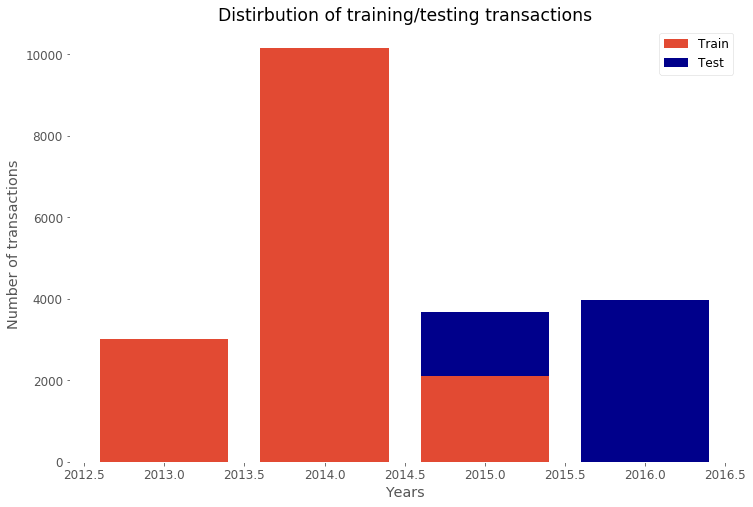

In [12]:
fig = plt.figure()
p1 = plt.bar(year_test_distr.index, year_test_distr, color='darkblue')
p2 = plt.bar(year_train_distr.index, year_train_distr)
plt.xlabel('Years')
plt.ylabel('Number of transactions')
plt.title('Distirbution of training/testing transactions')
plt.legend((p2[0], p1[0]), ('Train', 'Test'))
plt.show()

#### Median price changes

In [13]:
price_train_distr = df_train.groupby(['year', 'quarter'])['price_doc'].median().reset_index()
price_train_distr['quarter_year'] = price_train_distr[['quarter', 'year']].apply(lambda (x, y): 
                                                                             str(x) + '-' + str(y), axis=1)
price_train_distr.head(2)

SyntaxError: invalid syntax (<ipython-input-13-10570ec793f1>, line 2)

In [18]:
df_train['price_sq_m'] = df_train['price_doc'] / df_train['full_sq']
price_sq_m_train_distr = df_train.groupby(['year', 'quarter'])['price_sq_m'].median().reset_index()
price_sq_m_train_distr['quarter_year'] = price_sq_m_train_distr[['quarter', 'year']].apply(lambda (x, y): 
                                                                             str(x) + '-' + str(y), axis=1)
price_sq_m_train_distr.head(2)

SyntaxError: invalid syntax (<ipython-input-18-2063b55776bb>, line 3)

In [ ]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8, 6))
ax[0].bar(range(0, len(price_train_distr)), price_train_distr.price_doc)
ax[0].set_ylim(5e+6, 8e+6)
ax[0].set_xticks(range(0, len(price_train_distr)))
ax[0].set_xticklabels(price_train_distr.quarter_year, rotation=70)
ax[0].set_title('Median absolute price')
ax[0].set_ylabel('Price (in roubles)')


ax[1].bar(range(0, len(price_sq_m_train_distr)), price_sq_m_train_distr.price_sq_m)
ax[1].set_ylim(1e+5, 2e+5)
ax[1].set_xticks(range(0, len(price_sq_m_train_distr)))
ax[1].set_xticklabels(price_sq_m_train_distr.quarter_year, rotation=70)
ax[1].set_title('Median price per square meter')
ax[1].set_ylabel('Price (in roubles)')
ax[1].set_xlabel('Quarter-Year')

plt.show()

#### Price dependency on total and living areas in square meters

In [ ]:
sns.jointplot(x=np.log1p(df_train.full_sq.values), y=np.log1p(df_train.price_doc.values)) \
   .set_axis_labels('full_sq', 'price')
plt.show()

In [ ]:
sns.jointplot(x=np.log1p(df_train.life_sq.values), y=np.log1p(df_train.price_doc.values)) \
   .set_axis_labels('life_sq', 'price')
plt.show()

#### Floor and room number distribution

In [ ]:
floor_unique = sorted(df_train.floor.dropna().unique())

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
sns.countplot(x = "floor", data=df_train, ax = ax[0])
sns.countplot(x = "num_room", data = df_train, ax = ax[1])
ax[0].set_xticklabels(floor_unique, rotation=70)
plt.show()

#### Price difference between flats for Investment and for OwnerOccupiers

In [ ]:
invest = df_train[df_train.product_type == 'Investment']
owner = df_train[df_train.product_type == 'OwnerOccupier']

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6), sharey = True)
sns.distplot(np.log1p(invest.price_doc), ax = ax[0], axlabel = 'price_doc (log)')
sns.distplot(np.log1p(owner.price_doc), ax = ax[1], axlabel = 'price_doc (log)')
ax[0].set_title('Investment')
ax[1].set_title('OwnerOccupier')
ax[0].set_ylabel('Number of transactions')
plt.show()

#### Build year distribution 

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df_train.build_year.dropna())
plt.show()

### Regression test run

##### M.O: Separate the data based on columns that describe the house's features vs columns that describe the neighbourhood's features. Then split the training data 70-30 for each and train.

In [30]:
# Data separated by columns: Housing Descriptors and Neighbourhood Descriptors

df_house_columns = df_train[['timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type']].copy()

df_neighbourhood_columns = df_train.drop(['price_doc', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'num_room', 'kitch_sq', 'state', 'product_type'], axis=1)

# Price data converted to float for Pool method of Catboost
df_train.price_doc = df_train.price_doc.astype(float)

# Price data separated out for easy use
df_price_label = df_train.price_doc

### Housing Columns Training

In [31]:
# Train-Test split of 70-30

HX_train, HX_val, hy_train, hy_val = train_test_split(df_house_columns, df_price_label, test_size=0.3)
print (HX_train.shape, hy_train.shape)
print (HX_val.shape, hy_val.shape)

(10702, 11) (10702,)
(4587, 11) (4587,)


In [32]:
# Method to find the indices of categorical columns
def findCatIndices(df):
    cat_features = list(df.select_dtypes(include=['object']).columns.values)
    cat_indices = [df.columns.get_loc(name) for name in cat_features]
    return cat_indices

In [33]:
# initialize Pool
train_pool = Pool(HX_train, hy_train, cat_features=findCatIndices(HX_train))
val_pool = Pool(HX_val, cat_features=findCatIndices(HX_val)) 

## Need context here
test_cat_features = list(df_train.select_dtypes(include=['object']).columns.values)
test_cat_features.extend(['floor', 'max_floor', 'num_room', 'state'])
#df_train[cat_features] = df_train[cat_features].astype(str)
#df_test[cat_features] = df_test[cat_features].astype(str)

all_cat_indices = [df_train.columns.get_loc(name) for name in test_cat_features]
test_pool = Pool(df_test, cat_features=all_cat_indices)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
# specify the training parameters 
housing_model = CatBoostRegressor(learning_rate = 0.1, loss_function = 'RMSE', custom_metric = 'RMSE',  calc_feature_importance = True)

#train the model
housing_model.fit(train_pool, eval_set = val_pool, use_best_model=True, logging_level='Silent')

# make the prediction using the resulting model
#preds = model.predict(test_pool)


### Neighbourhood Columns Training

In [ ]:
# Train-Test split of 70-30

NX_train, NX_val, ny_train, ny_val = train_test_split(df_neighbourhood_columns, df_price_label, test_size=0.3)
print (NX_train.shape, ny_train.shape)
print (NX_val.shape, ny_val.shape)

In [ ]:
# initialize Pool
train_pool = Pool(NX_train, ny_train, cat_features=findCatIndices(NX_train))
val_pool = Pool(NX_val, cat_features=findCatIndices(NX_val)) 
#test_pool = Pool(df_test, cat_features=findCatIndices(df_test))